In [5]:
import xgboost
import joblib
import numpy as np
from sklearn.metrics import accuracy_score
from quadratic_weighted_kappa import quadratic_weighted_kappa
import pandas as pd

In [6]:
#x = joblib.load('essay_ease10_sbert768_simbow_langerr_780')
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap1')
y = joblib.load("score_asap1")

In [7]:
x.shape

(1783, 780)

In [9]:
x[0][:12]

array([1.91200000e+03, 3.92000000e+02, 4.06628242e+00, 5.78000000e+02,
       1.55000000e+02, 8.90000000e+01, 4.30000000e+01, 3.06122449e-02,
       1.54000000e+02, 8.17658544e-01, 5.65991405e-01, 7.84518828e-03])

In [14]:
def get_feature_names_extended():
    ease_feats = ['Answer Length', 'Word Counts', 'Average Word Length', 'Good n-gram', 'Prompt Overlap',
              'Prompt Overlap (synonyms)', 'Punctuation Counts', 'Spelling Error', 'Unique Words', 'Prompt Similarity SBert']

    sbert_feats = []
    sbert_dim = 768

    for i in range(0, sbert_dim):
    	fname = "sbert_" + str(i) 
    	sbert_feats.append(fname)
    
    prompt_similarity_bow = ["Prompt Similarity BOW"]
    lang_error = ["Language Error"]
    
    feature_names = ease_feats + prompt_similarity_bow + lang_error + sbert_feats 

    print("len feature names: ", len(feature_names))
    
    return feature_names

feature_names = get_feature_names_extended()#[:12]

len feature names:  780


In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [6]:
model2 = xgboost.XGBRegressor(objective ='reg:squarederror',
                colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [7]:
qwk_scores = []

test_indices = []
pred_labels = []

for train_index, test_index in kf.split(x, y):
#     print("train_index: ", len(train_index))
#     print("test_index: ", len(test_index))
#     print("train_index: ", train_index[:20])
#     print("test_index: ", test_index[:20])
    
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    #d_train = xgboost.DMatrix(X_train, label=Y_train, feature_names=feature_names)
    #d_test = xgboost.DMatrix(X_test, label=Y_test, feature_names=feature_names)
         
    model2.fit(X_train, Y_train)
    
    #rf.fit(X_train, Y_train)
    
    #predict = model.predict(d_test)
    predict = model2.predict(X_test)
    #predict = rf.predict(X_test)
    predict = np.round(predict)
    
    pred_labels.extend(predict)
    test_indices.extend(test_index)

    result = quadratic_weighted_kappa(Y_test, predict)
    
    print("Qwk : ", result)
    
    qwk_scores.append(result)
    
    
np.mean(qwk_scores)

Qwk :  0.8082407525645937
Qwk :  0.7596110180240844
Qwk :  0.7823694002942279
Qwk :  0.7724125555173393
Qwk :  0.7906373334375365


0.7826542119675564

In [10]:
print(len(pred_labels))
print(len(test_indices))

1783
1783


In [11]:
pred_labels_int = list(map(int, pred_labels))
print(pred_labels)
print(pred_labels_int)

[11.0, 8.0, 10.0, 7.0, 8.0, 7.0, 8.0, 6.0, 10.0, 9.0, 10.0, 9.0, 11.0, 8.0, 10.0, 8.0, 7.0, 7.0, 9.0, 5.0, 7.0, 5.0, 10.0, 10.0, 7.0, 7.0, 7.0, 8.0, 9.0, 8.0, 7.0, 9.0, 9.0, 6.0, 7.0, 7.0, 9.0, 8.0, 8.0, 8.0, 7.0, 9.0, 10.0, 9.0, 8.0, 8.0, 8.0, 8.0, 11.0, 8.0, 10.0, 8.0, 8.0, 8.0, 9.0, 9.0, 8.0, 8.0, 11.0, 8.0, 9.0, 8.0, 9.0, 7.0, 6.0, 8.0, 6.0, 8.0, 9.0, 7.0, 11.0, 9.0, 10.0, 8.0, 11.0, 9.0, 11.0, 6.0, 7.0, 7.0, 10.0, 7.0, 9.0, 8.0, 9.0, 8.0, 10.0, 9.0, 9.0, 9.0, 8.0, 9.0, 8.0, 6.0, 11.0, 9.0, 7.0, 10.0, 9.0, 8.0, 10.0, 11.0, 9.0, 9.0, 8.0, 7.0, 7.0, 9.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 8.0, 9.0, 9.0, 8.0, 12.0, 8.0, 9.0, 10.0, 8.0, 9.0, 6.0, 9.0, 7.0, 8.0, 9.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 8.0, 8.0, 10.0, 8.0, 9.0, 10.0, 8.0, 8.0, 8.0, 10.0, 8.0, 9.0, 9.0, 8.0, 9.0, 8.0, 9.0, 8.0, 9.0, 10.0, 9.0, 8.0, 10.0, 8.0, 9.0, 9.0, 8.0, 6.0, 9.0, 5.0, 11.0, 7.0, 9.0, 9.0, 7.0, 8.0, 9.0, 8.0, 9.0, 10.0, 11.0, 7.0, 8.0, 9.0, 7.0, 7.0, 10.0, 6.0, 10.0, 8.0, 9.0, 8.0, 8.0, 9.0, 8.0, 9.0, 

In [12]:
new_score = np.zeros(1783)
new_score

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
new_score[test_indices] = pred_labels_int

In [14]:
new_score

array([9., 9., 8., ..., 7., 3., 7.])

In [15]:
new_score[60]

8.0

In [16]:
joblib.dump(new_score, 'score_model_normalized')

['score_model_normalized']

## Create model

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(1426, 780)

In [38]:
d_train = xgboost.DMatrix(X_train, label=Y_train, feature_names=feature_names)
d_test = xgboost.DMatrix(X_test, label=Y_test, feature_names=feature_names)

In [39]:
model = xgboost.train({"learning_rate": 0.1, "max_depth":3}, d_train, 200, evals = [(d_test, "test")], early_stopping_rounds=20)

[0]	test-rmse:7.21406
Will train until test-rmse hasn't improved in 20 rounds.
[1]	test-rmse:6.50251
[2]	test-rmse:5.86048
[3]	test-rmse:5.28557
[4]	test-rmse:4.76954
[5]	test-rmse:4.30400
[6]	test-rmse:3.88846
[7]	test-rmse:3.51410
[8]	test-rmse:3.17837
[9]	test-rmse:2.88086
[10]	test-rmse:2.61221
[11]	test-rmse:2.37468
[12]	test-rmse:2.16462
[13]	test-rmse:1.97962
[14]	test-rmse:1.81092
[15]	test-rmse:1.66544
[16]	test-rmse:1.53365
[17]	test-rmse:1.41765
[18]	test-rmse:1.32182
[19]	test-rmse:1.23446
[20]	test-rmse:1.16323
[21]	test-rmse:1.09877
[22]	test-rmse:1.04612
[23]	test-rmse:1.00023
[24]	test-rmse:0.96256
[25]	test-rmse:0.93116
[26]	test-rmse:0.90499
[27]	test-rmse:0.88542
[28]	test-rmse:0.86772
[29]	test-rmse:0.85433
[30]	test-rmse:0.84379
[31]	test-rmse:0.83569
[32]	test-rmse:0.82749
[33]	test-rmse:0.82254
[34]	test-rmse:0.81788
[35]	test-rmse:0.81650
[36]	test-rmse:0.81314
[37]	test-rmse:0.81056
[38]	test-rmse:0.80996
[39]	test-rmse:0.80856
[40]	test-rmse:0.80959
[41]	test-

In [40]:
yxgb_pred = model.predict(d_test)
yxgb_pred = np.round(yxgb_pred)

In [41]:
accuracy_score(yxgb_pred, Y_test)

0.5126050420168067

In [42]:
quadratic_weighted_kappa(yxgb_pred, Y_test)

0.8095107564118929

## Model interpretation

In [43]:
imp_vals = model.get_fscore()
#print(imp_vals)
feature_important = model.get_score(importance_type='weight')
feats_sorted = sorted(feature_important.items(), key=lambda x: x[1], reverse=True)
aa_25 = feats_sorted[:25]

In [44]:
x_axis = [i[0] for i in aa_25]
y_axis = [i[1] for i in aa_25]

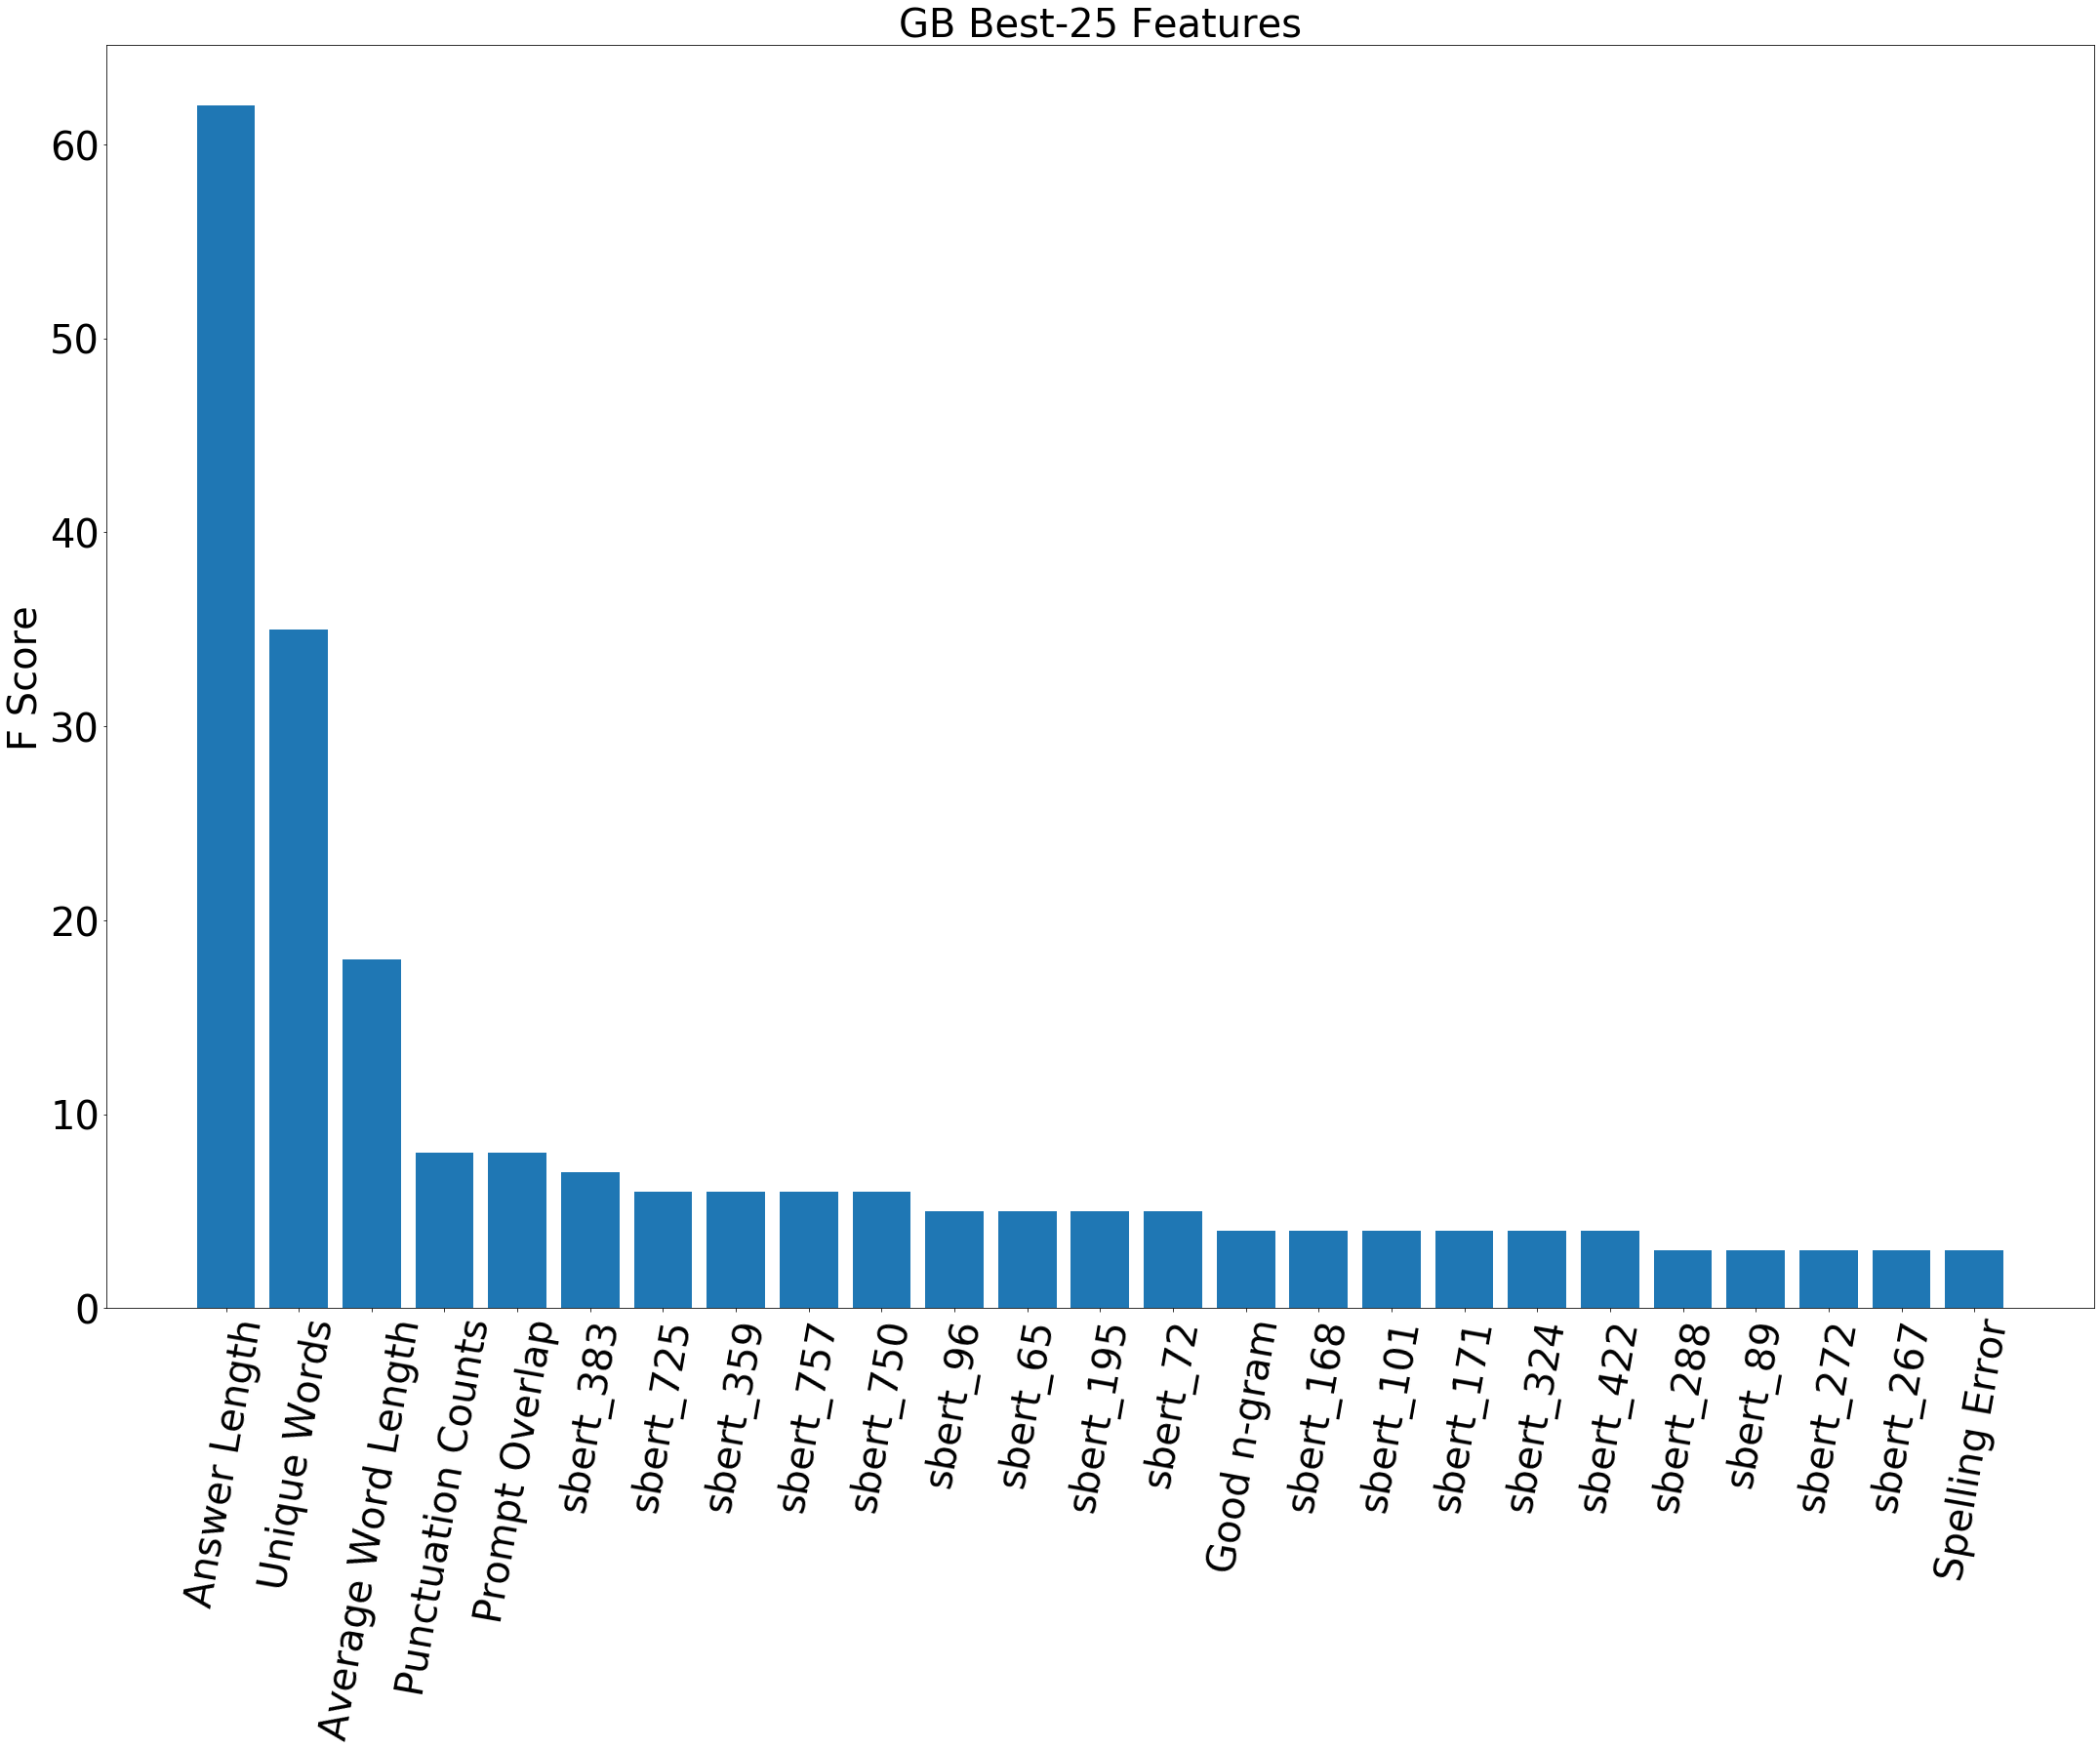

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
plt.title("GB Best-25 Features", fontsize=40)
plt.bar(x_axis, y_axis, width=0.8, align='center')
plt.xticks(x_axis, fontsize=40, rotation=80)
plt.ylabel("F Score", fontsize=40)
plt.yticks(fontsize=40)
plt.tight_layout()
plt.savefig('gb_best_25.png')
plt.show()